# Part 1
Question-1

In [65]:
# Initialisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# import the Data as panda dataframe
df = pd.read_csv('OldFaithful.csv')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Erouptions: 0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64


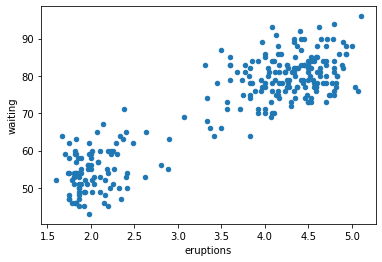

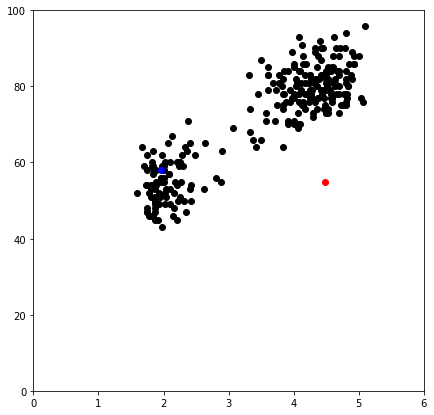

In [67]:
#Scatterplots
np.random.seed(20)
k = 2
x = df['eruptions']
y = df['waiting']
# Centroids[i] = [x,y]
centroids = {
    i+1: [x[np.random.randint(0,271)],y[np.random.randint(0,271)]]
    for i in range(k)
}
df.plot(kind='scatter',x='eruptions',y='waiting')

print("Eruptions:",x)
fig = plt.figure(figsize = (7,7))
plt.scatter(df['eruptions'],df['waiting'],color='k')
colmap = {1:'r',2:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color = colmap[i])
plt.xlim(0,6)
plt.ylim(0,100)
plt.show()


0      b
1      r
2      b
3      b
4      b
      ..
267    b
268    r
269    b
270    r
271    b
Name: color, Length: 272, dtype: object
   eruptions  waiting  distance_from_1  distance_from_2  closest color
0      3.600       79          576.883          442.633        2     b
1      1.800       54            3.683           16.167        1     r
2      3.333       74          362.150          257.366        2     b
3      2.283       62           51.200           16.316        2     b
4      4.533       85          900.050          731.566        2     b


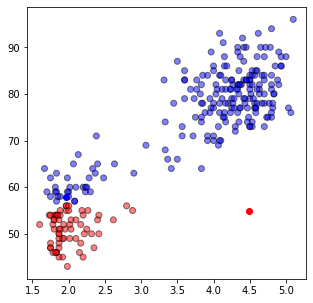

In [76]:
# Assigning clusters to points
def allot(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (np.sqrt(
            (df['eruptions']-centroids[i][0])**2)
            +(df['waiting']-centroids[i][1])**2)

    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # Mapping a point to cluster depending on the minimun distance
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x:colmap[x])
    return df

df = allot(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['eruptions'],df['waiting'],color = df['color'],alpha = 0.5,edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color = colmap[i])

plt.show()
